In [1]:
from google.colab import files
uploaded = files.upload()

Saving prudential2021.xlsx to prudential2021.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import io
df = pd.read_excel('/content/prudential2021.xlsx')

In [ ]:
!nvidia -smi

/bin/bash: nvidia: command not found


In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(df)

In [13]:
pip install dabl

     |████████████████████████████████| 558 kB 4.3 MB/s 


In [14]:
import dabl

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
dabl.detect_types(df, type_hints=None, max_cat_cardinality='auto', dirty_float_threshold=0.9, near_constant_threshold=0.95, target_col=None, verbose=0)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
POLICY SITE,False,False,False,True,False,False,False
REGION,False,False,False,True,False,False,False
COMPANY,False,False,True,False,False,False,False
CLAIM #,False,False,False,False,False,True,False
POLICY #,False,False,False,False,False,True,False
INS LAST,False,False,False,False,False,True,False
INS FIRST,False,False,False,False,False,True,False
CLAIM TYPE,False,False,False,False,False,False,True
INS IND,False,False,False,False,False,False,True
MAJOR LOB,False,False,False,False,False,False,True


In [5]:
df.select_dtypes(exclude="number").head()

,POLICY SITE,REGION,COMPANY,CLAIM #,POLICY #,INS LAST,INS FIRST,CLAIM TYPE,INS IND,MAJOR LOB,...,POL REMAINING BAL,cmA FACE AMT PAID + PUA + ADB or Annuity Value,PUA AMT PAID,PREM ADJUST PAID,DIVIDENDS PAID,LOAN WITHHELD,INTEREST PAID,Proof of Death,Proof of Loss,Age at Loss
0,PCOMM,PPLC,101,PRDC00021993,LU0866682,MARQUIS,ROBERT,Death Claim,Base,Individual,...,0,75000,0,0,0,0,6867.12,8/15/2018,5/24/2021,68
1,PCYBER,PPRU,06,PRDC00024929,01315793,PETTIS,ANGELA,Death Claim,Base,Individual,...,0,10000,0,0,0,0,991.89,3/7/2019,6/15/2021,46
2,PCOMM,PPLC,101,PRDC00025096,LU1127348,CALIRI,SMADAR,Death Claim,Base,Individual,...,0,343930,0,150,0,0,34600.3,6/4/2019,11/8/2021,55
3,PCYBER,PPRU,05,PRDC00026261,W1945940,PROCTOR,ROBERT,Death Claim,Base,Individual,...,0,3754.65,2754.65,0,0,0,0,5/1/2020,5/27/2021,66
4,PCOMM,PPLC,101,PRDC00026314,LU2230141,KNEELING,HERMANN,Death Claim,Base,Individual,...,0,200000,0,1004,0,0,16090.41,9/23/2019,3/19/2021,74


In [ ]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()
unique_values


CLAIM TYPE                     1
MAJOR LOB                      1
CLAIM STATUS                   2
REGION                         3
PAR TYPE                       3
SPL HANDLE CODE                3
POLICY SITE                    4
INS IND                        4
POLICY MANAGEMENT STATUS       4
POL RPTNG STATUS               4
REPORTING PRODUCT TYPE         5
MANNER                         7
POLICY STATUS                 17
EXAMINER                      18
PRODUCT SUBTYPE               19
PRODUCT TYPE                  26
ISSUE STATE                   56
INS RES ST                    62
CAUSE OF DEATH                66
CLOSED DATE                  253
CYBER PAID DATE              269
Proof of Loss                282
Proof of Death               412
DATE POLICY REPORTED         476
NOTIFIED DATE                479
DATE POLICY ENTERED          482
DATE OF LOSS                 781
PLAN CODE                    935
INS FIRST                   2009
INS LAST                    4674
ISSUE DATE

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
n_duplicates = df.drop(labels=["POLICY #","CLAIM #"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 8 duplicates in your database.


In [ ]:
columns_to_consider = df.drop(labels=["POLICY #"], axis=1).columns
df = df.drop_duplicates(subset=columns_to_consider)

In [ ]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

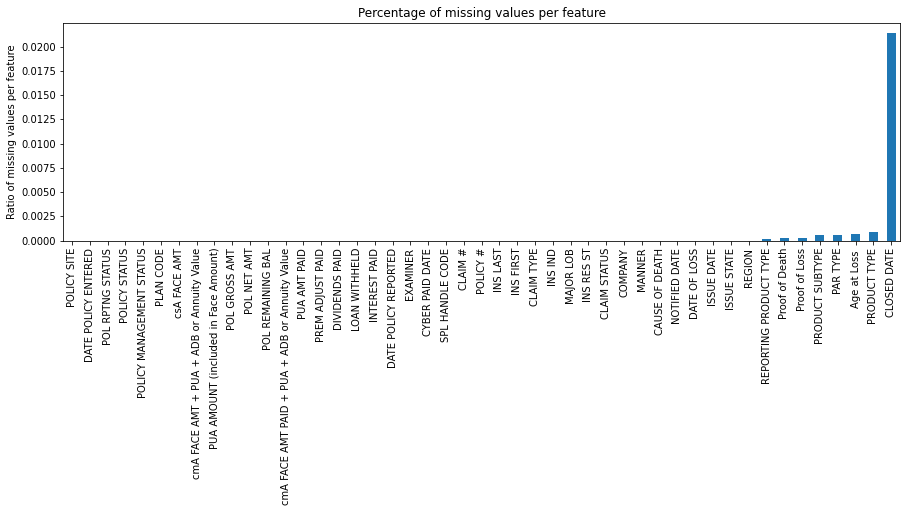

In [ ]:
#missing values in each coulmns
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

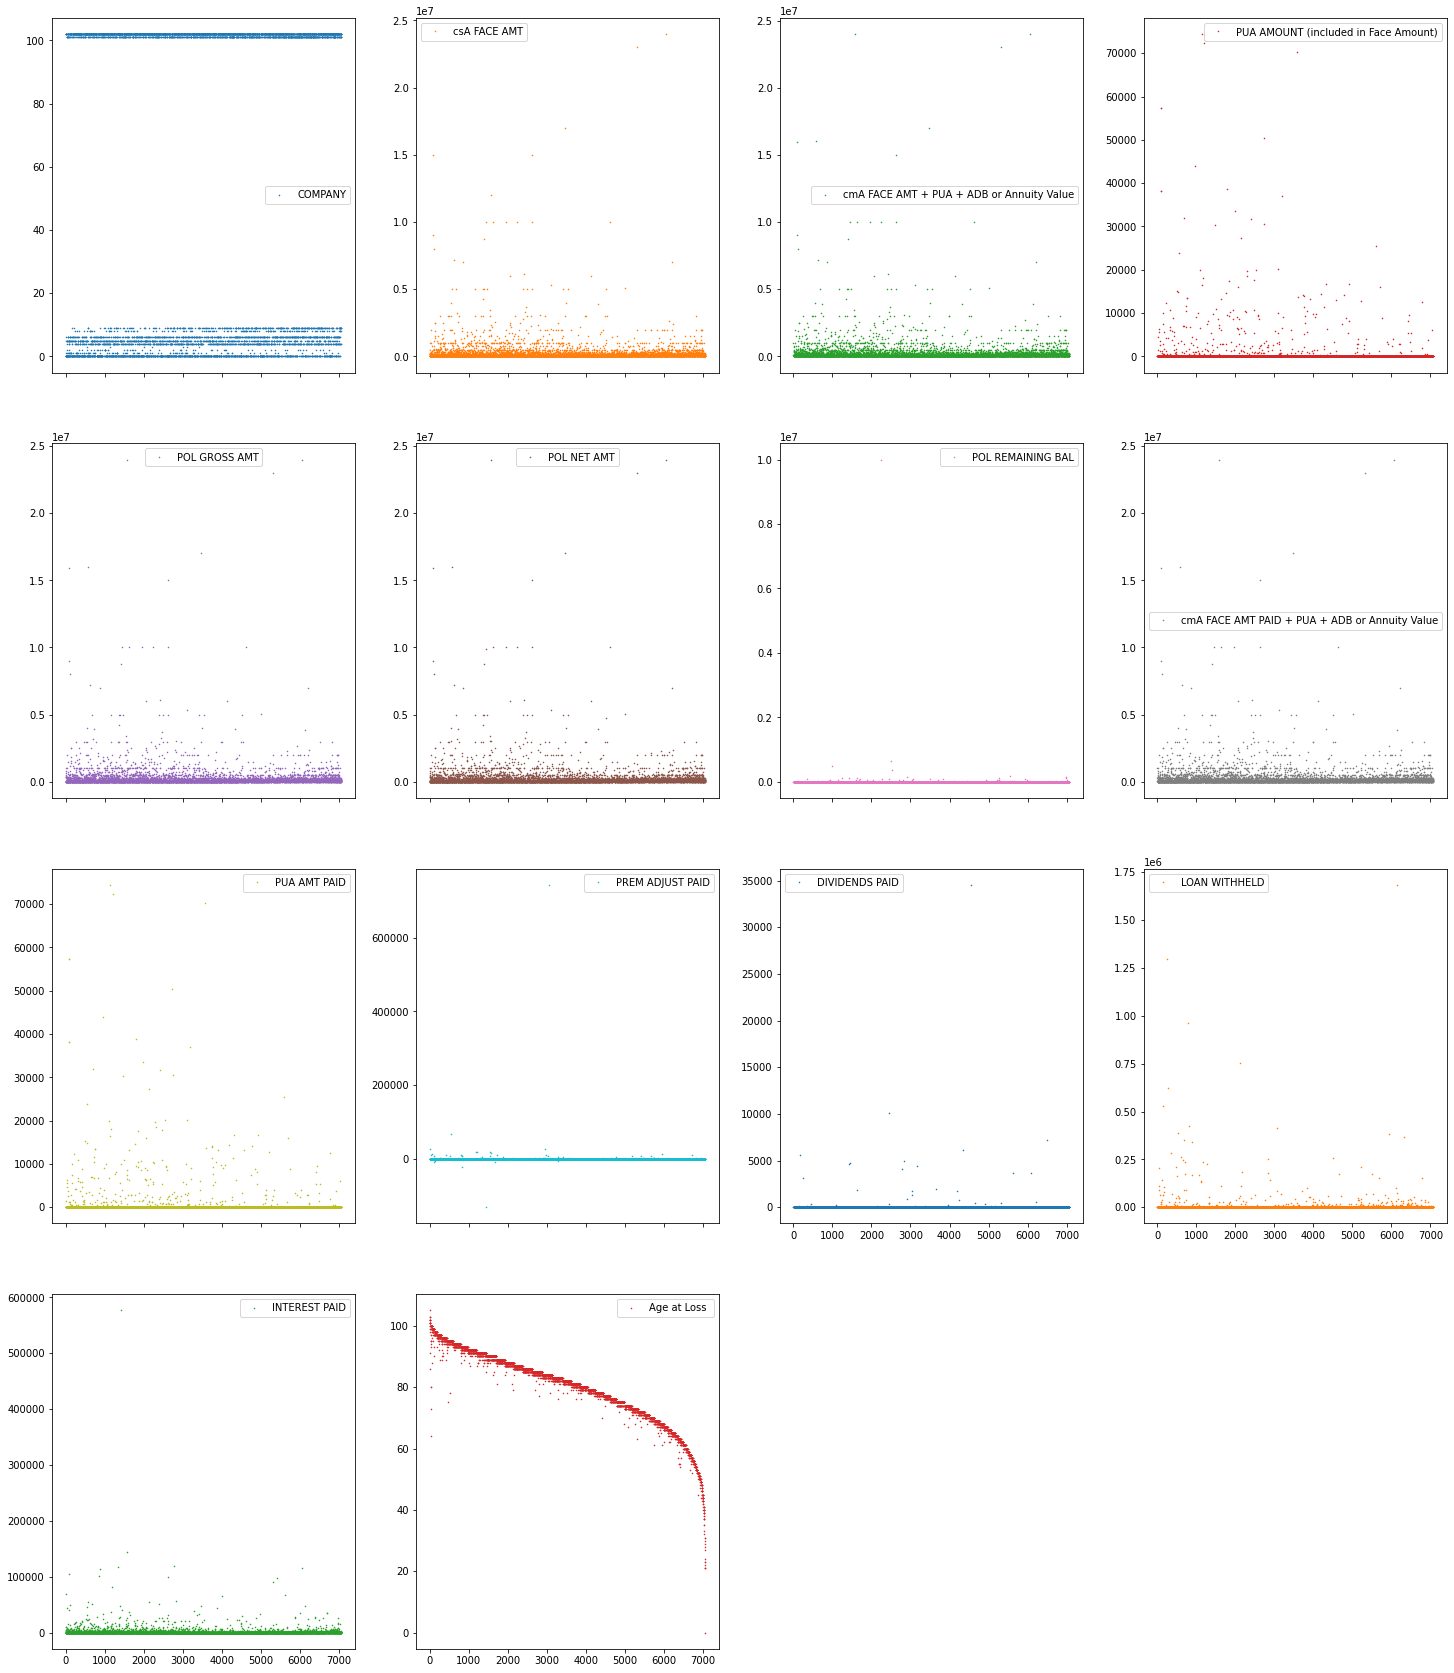

In [ ]:
df.plot(lw=0, marker="*" , subplots=True, layout=(-1, 4),
          figsize=(25, 30), markersize=1);

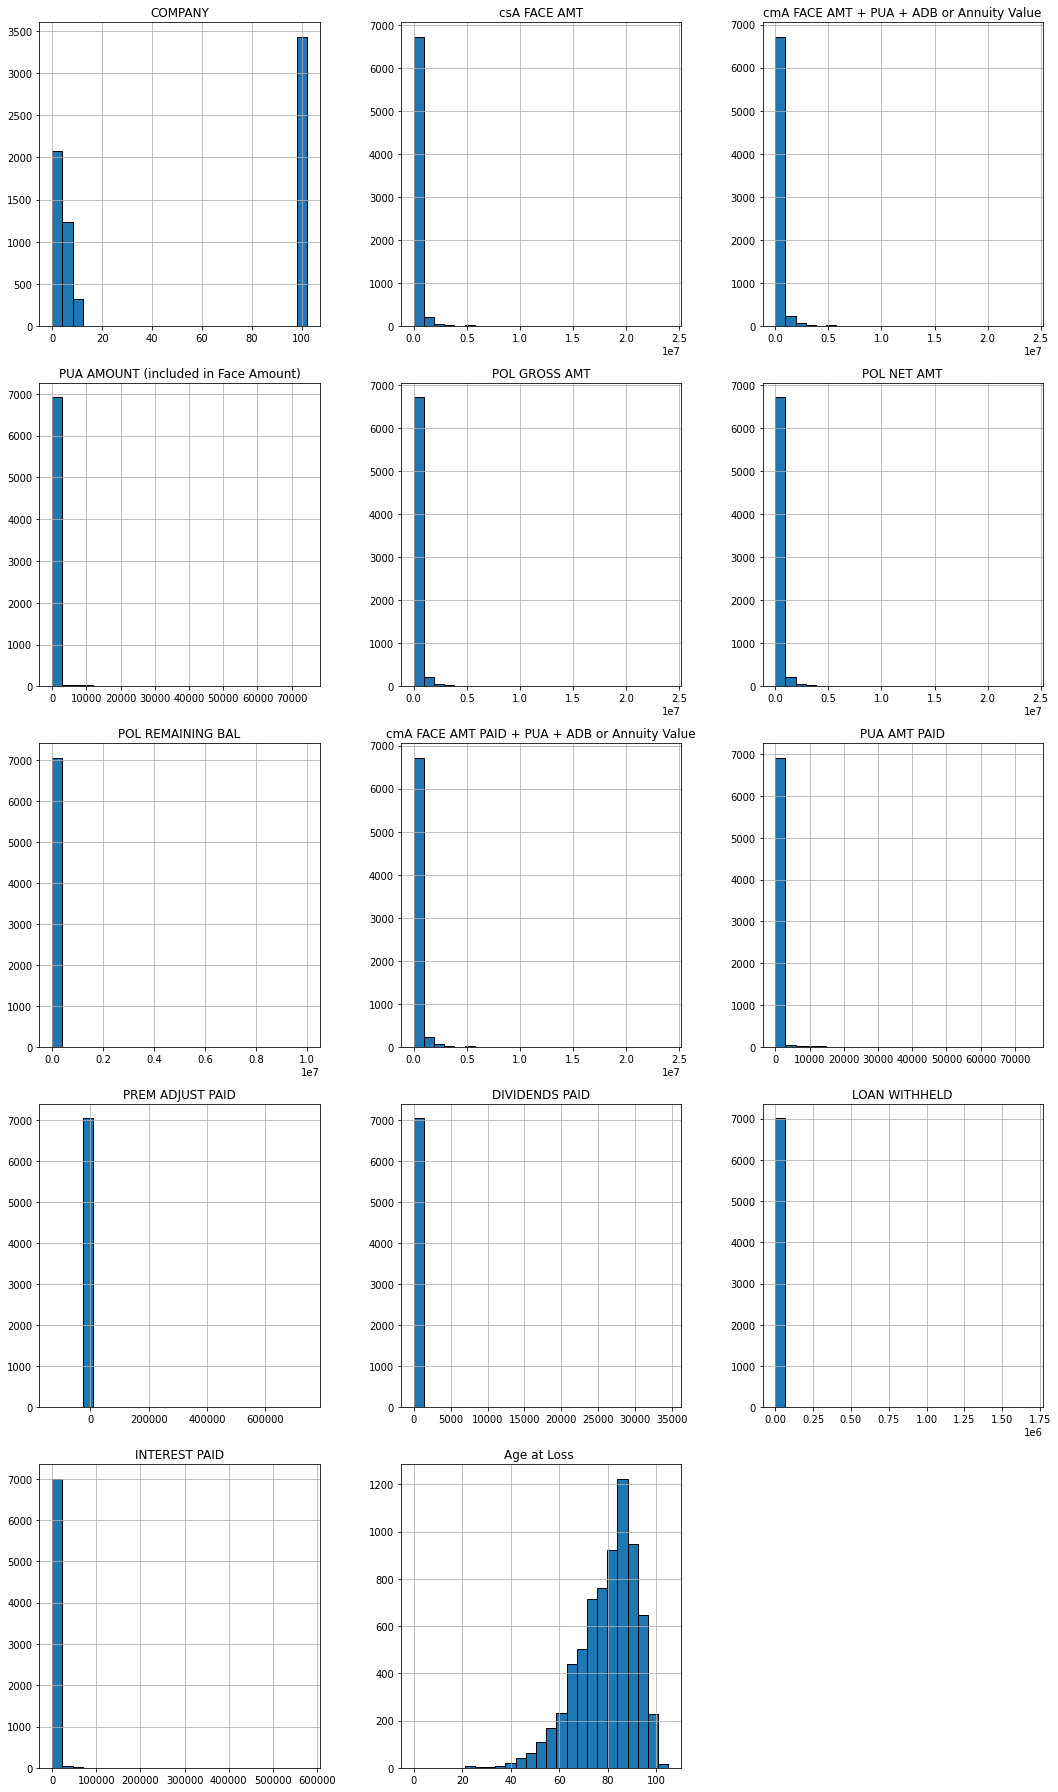

In [ ]:
df.hist(bins=25, figsize=(15, 25), layout=(-1, 3), edgecolor="black")
plt.tight_layout();

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 39 outliers in column csA FACE AMT.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 26 outliers in column POL NET AMT.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 28 outliers in column POL GROSS AMT.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 28 outliers in column cmA FACE AMT + PUA + ADB or Annuity Value.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 28 outliers in column cmA FACE AMT PAID + PUA + ADB or Annuity Value.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 38 outliers in column INTEREST PAID.
 

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f257e93fdd0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f257e6faad0>,
       dtype=object)]

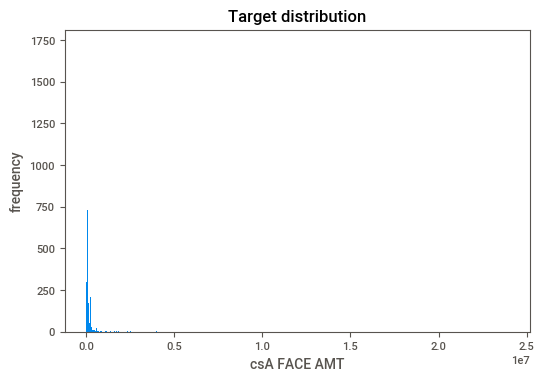

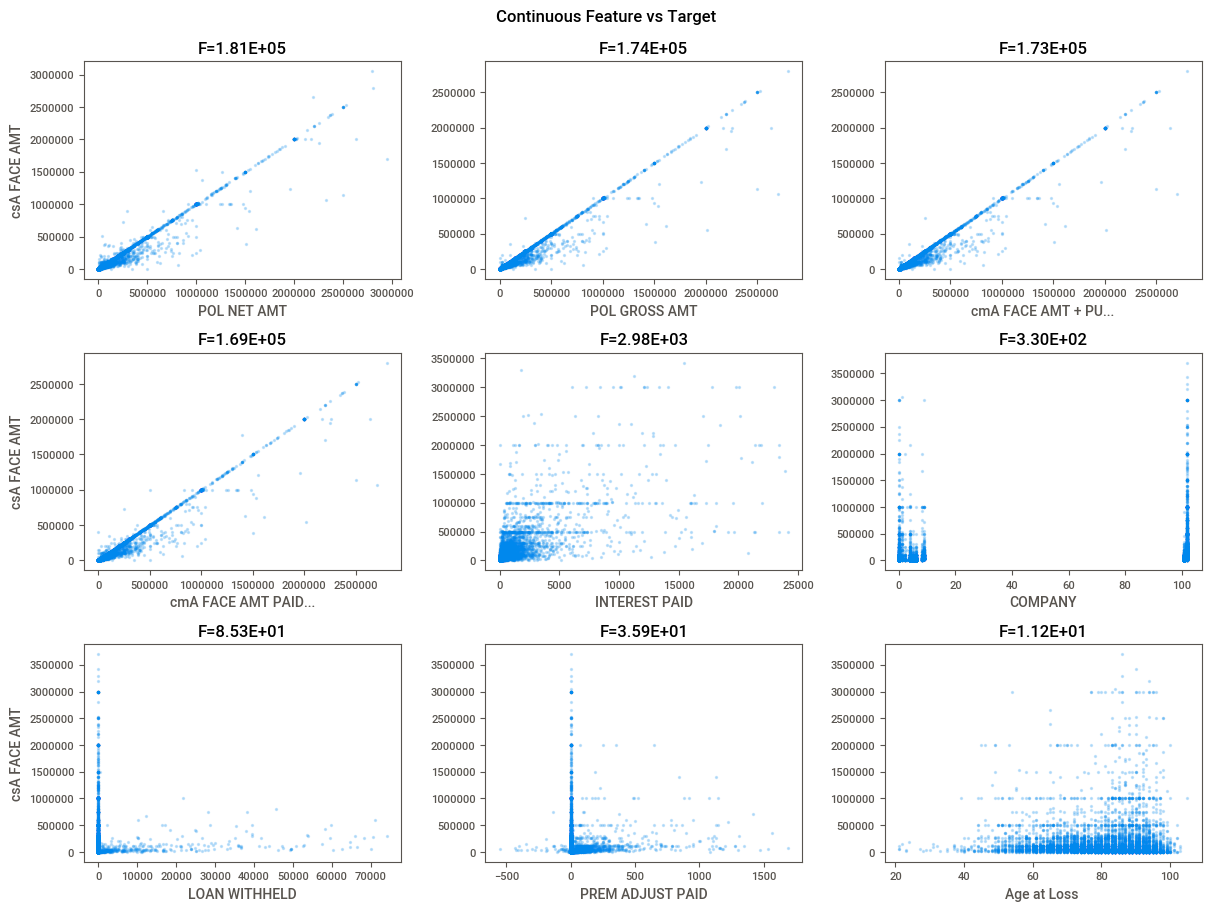

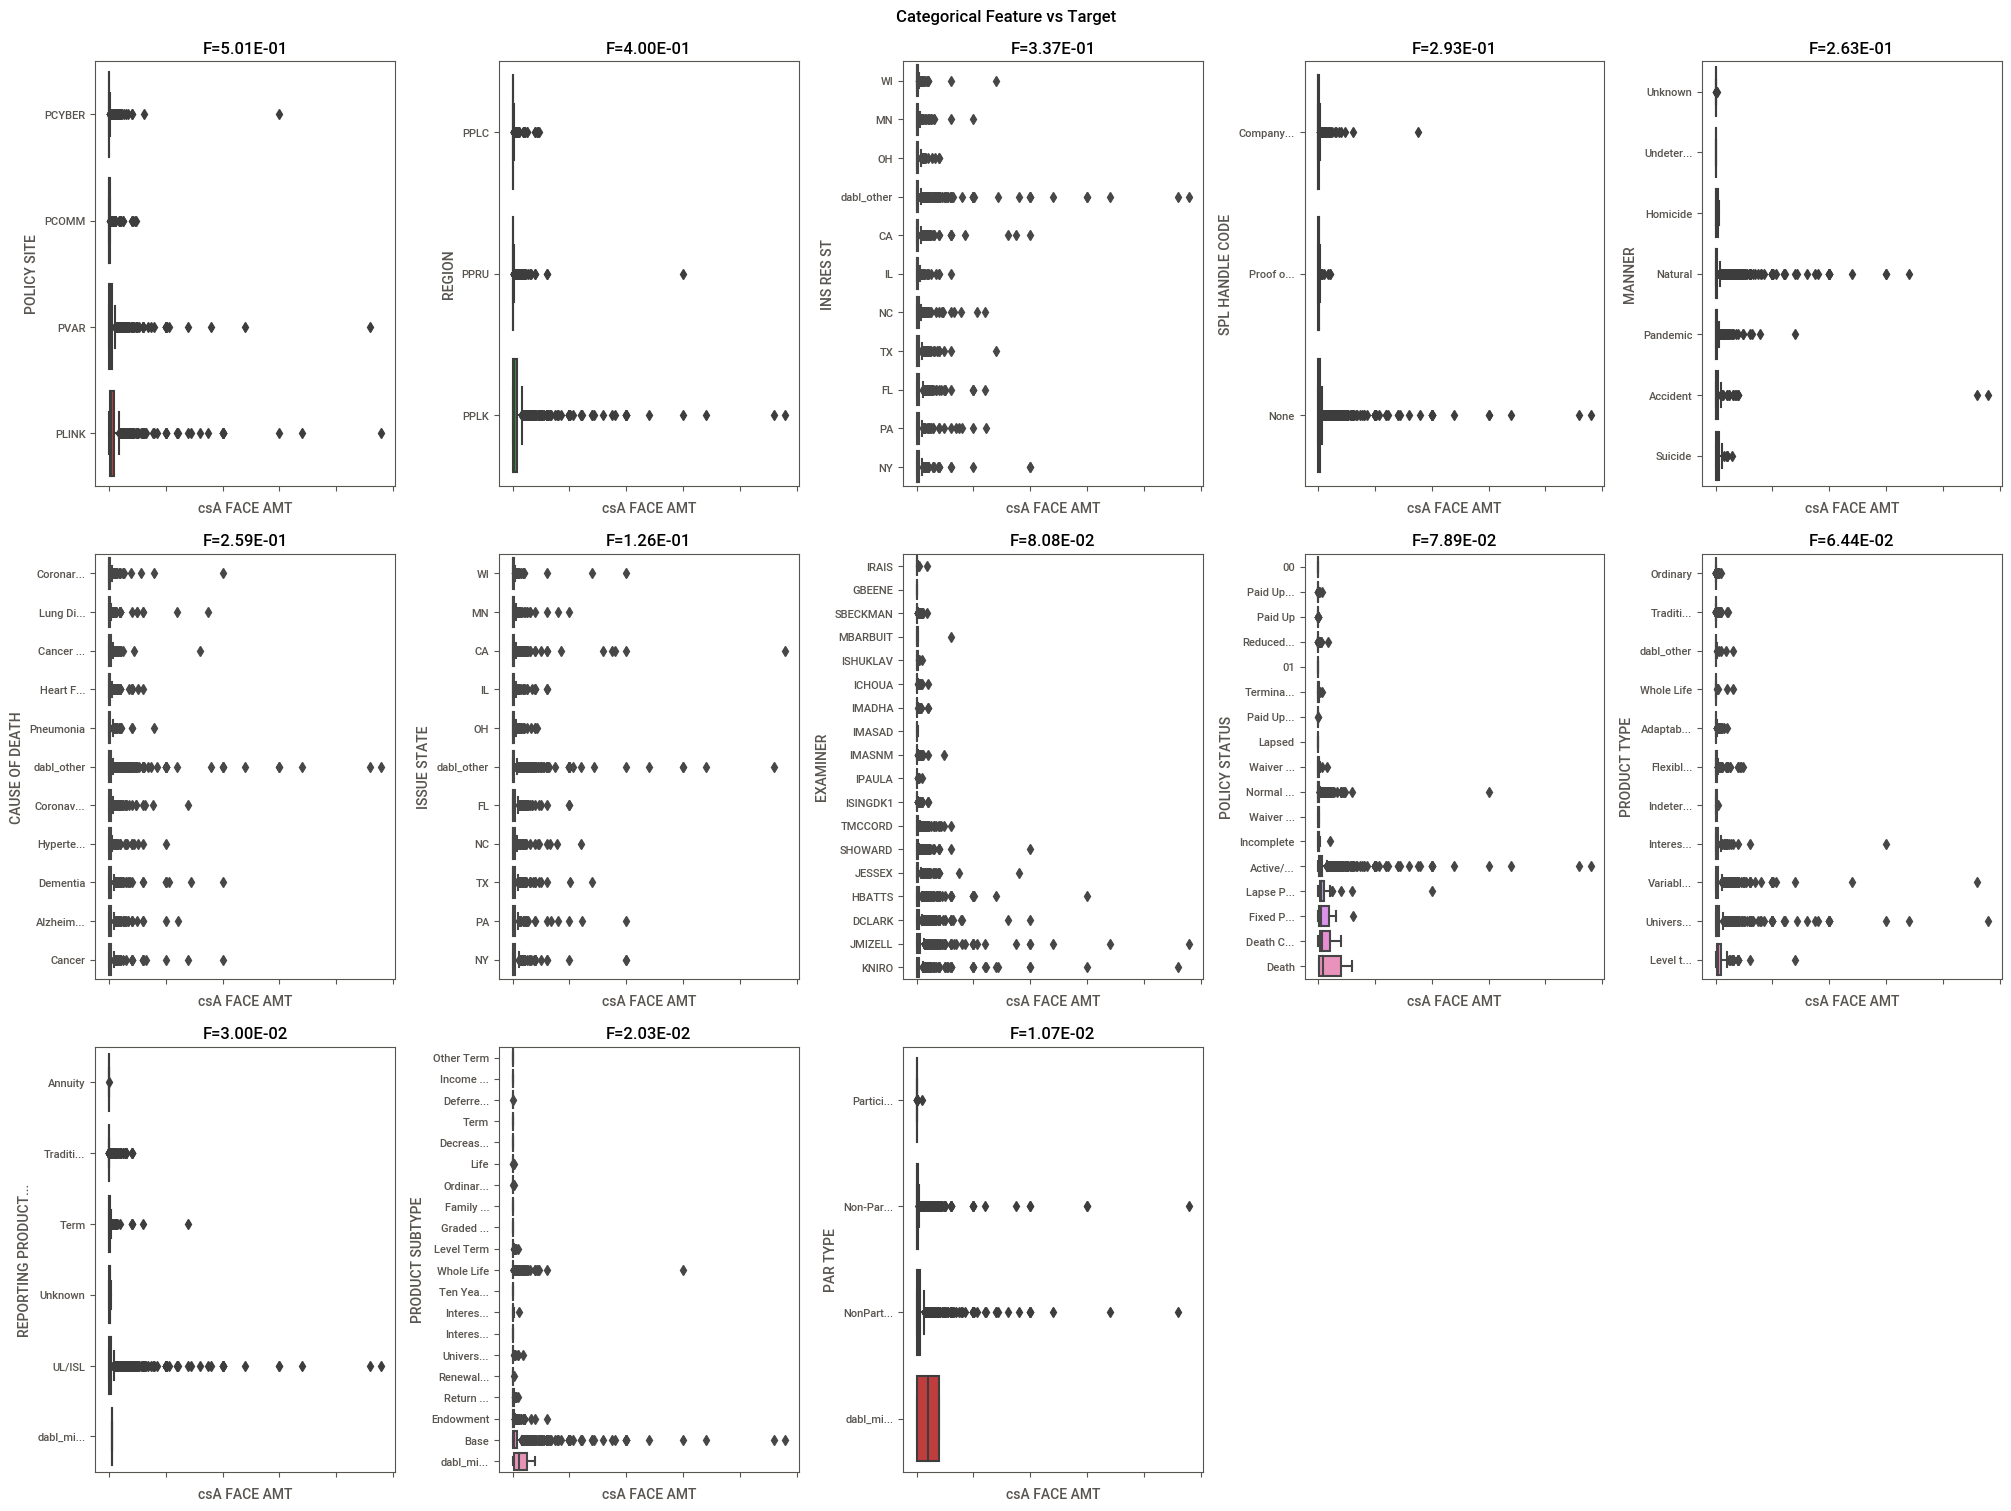

In [ ]:
dabl.plot(df, target_col='csA FACE AMT' ) 

In [ ]:
df = df[df['REPORTING PRODUCT TYPE'].notnull()]

In [16]:
dabl.plot(df, target_col='days to close' ) 

TypeError: ignored

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df)
fig.show()

In [ ]:
pip install autoviz

     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 174 kB 10.5 MB/s 
     |████████████████████████████████| 4.3 MB 37.6 MB/s 
     |████████████████████████████████| 11.2 MB 29.8 MB/s 
     |████████████████████████████████| 12.9 MB 25.3 MB/s 
     |████████████████████████████████| 88 kB 7.7 MB/s 
     |████████████████████████████████| 3.1 MB 19.8 MB/s 
     |████████████████████████████████| 18.5 MB 701 kB/s 
     |████████████████████████████████| 895 kB 28.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=d951dd2e149a14de4981d813888ee52a71008673e29f159b9881dc48001af04f
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
  Attempting uninstall: panel
    Found existing in

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import nltk
nltk.download('punkt')
nltk.download('wordnet')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD=21329330176

In [ ]:
AV = AutoViz_Class()
sep = ','
target = 'POLICY SITE'
filename='/content/prudential2021.xlsx'

In [ ]:
dft = AV.AutoViz(
    filename=filename,
    sep=sep,
    depVar=target,
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="html",
    max_rows_analyzed=20000000,
    max_cols_analyzed=70,
)


Shape of your Data Set loaded: (7067, 47)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    46 Predictors classified...
        2 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################
Saving scatterplots in HTML format
Saving pair_scatters in HTML format


In [ ]:
# Product type
dfter = AV.AutoViz(
    filename,
    sep=sep,
    depVar='POLICY SITE',
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="html",
    max_rows_analyzed=20000000,
    max_cols_analyzed=70,
)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dftt2 = AV.AutoViz(
    filename='',
    sep=sep,
    depVar=target,
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="jpg",
    max_rows_analyzed=20000000, 
    max_cols_analyzed=70,
    save_plot_dir='/content/drive/MyDrive/PowerApps'
    )

Shape of your Data Set loaded: (7067, 47)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    46 Predictors classified...
        2 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################
Total Number of Scatter Plots = 91


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Could not draw Distribution Plots
Could not draw Pivot Charts against Dependent Variable
Could not draw wordcloud plot for NOTIFIED DATE
Could not draw wordcloud plot for DATE OF LOSS
Could not draw wordcloud plot for ISSUE DATE
Could not draw wordcloud plot for DATE POLICY REPORTED
Could not draw wordcloud plot for DATE POLICY ENTERED
Could not draw wordcloud plot for CYBER PAID DATE
Could not draw wordcloud plot for Proof of Death
Could not draw wordcloud plot for Proof of Loss
Time to run AutoViz = 248 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
pip install sweetviz 

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
dft = df.groupby(['PRODUCT TYPE','PRODUCT SUBTYPE'])['CLAIM #'].count()
dft

PRODUCT TYPE           PRODUCT SUBTYPE        
Adaptable Life         Interest Sensitive Life     14
                       Life                         3
                       Whole Life                 417
Annual Renewable Term  Level Term                   1
                       Ten Year Term                1
                                                 ... 
Variable Universal     Endowment                  307
Whole Life             Base                        30
                       Graded Prem Whole Life       1
                       Ordinary Life                3
                       Whole Life                  18
Name: CLAIM #, Length: 64, dtype: int64

In [ ]:
# pip install dtale pip install lightwood

In [ ]:
pip install mljar-supervised

In [ ]:
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split

In [ ]:
df for ML train and test 

In [ ]:
automl = AutoML(mode='Explain')
automl.fit(df, test)

In [22]:
gdf = df.groupby('PRODUCT TYPE')
gdf['days to close'].agg([np.sum, np.mean, np.std, np.max, np.min])

,sum,mean,std,amax,amin
PRODUCT TYPE,,,,,
Accident & Health,0.0,NaN,NaN,NaN,NaN
Adaptable Life,25700.0,59.216590,70.965523,765.0,8.0
Additional Payment PUA RIder,0.0,NaN,NaN,NaN,NaN
Annual Renewable Term,155.0,51.666667,1.527525,53.0,50.0
Annuity,322.0,80.500000,48.952358,140.0,30.0
Decreasing Term,41.0,41.000000,NaN,41.0,41.0
Deferred Annuity,78.0,78.000000,NaN,78.0,78.0
Endowment,55.0,55.000000,NaN,55.0,55.0
Extended Term,61.0,61.000000,NaN,61.0,61.0
